In [56]:
import pandas as pd
import numpy as np
from nltk.corpus import words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline
sentiment_analyzer = pipeline("sentiment-analysis")
import re
import nltk
nltk.download('words')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [30]:
def length_score(domain):
    max_length = 15  # Assuming domain names above 15 characters are too long
    return max(0, 1 - len(domain) / max_length)

In [31]:
def memorability_score(domain):
    # word_list = domain.split()  #split words
    word_list = re.findall(r'[A-Z][a-z]*|[a-z]+', domain)
    known_words = set(words.words())
    score = sum(1 for word in word_list if word in known_words) / len(word_list)
    return score

In [32]:
def relevance_score(domain, keywords):
    # Convert domain and keywords into vectors
    vectorizer = CountVectorizer().fit([domain] + keywords)
    domain_vector = vectorizer.transform([domain])
    keywords_vector = vectorizer.transform([" ".join(keywords)])

    # Calculate cosine similarity between the domain and keywords
    return cosine_similarity(domain_vector, keywords_vector)[0][0]

In [33]:


def sentiment_score(domain):
    result = sentiment_analyzer(domain)[0]
    # Assume positive sentiment is more desirable
    return result['score'] if result['label'] == 'POSITIVE' else (1 - result['score'])

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
data = pd.read_csv('/content/drive/My Drive/data.csv')

In [36]:
data.head()

,domain,price
0,Leylah.com,"$6,599"
1,ClientAssist.com,"$9,495"
2,TechMorph.com,"$2,720"
3,Bonucci.com,"$6,250"
4,Trenzi.com,"$3,599"


In [37]:
# Drop rows with any null values
data = data.dropna()

# Reset the index and drop the old index column
data = data.reset_index(drop=True)

data['domain'] = data['domain'].str.split(r'\.').str[0]
data['price'] = data['price'].str.replace(r'\$', '', regex=True)
data['price'] = data['price'].str.replace(r',', '', regex=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce').round().astype('Int64')

# Drop rows with any null values
data = data.dropna()

# Reset the index and drop the old index column
data = data.reset_index(drop=True)

In [38]:
data.head()

,domain,price
0,Leylah,6599
1,ClientAssist,9495
2,TechMorph,2720
3,Bonucci,6250
4,Trenzi,3599


In [39]:
data['length_score']=data['domain'].apply(length_score)


In [40]:
data.head()

,domain,price,length_score
0,Leylah,6599,0.600000
1,ClientAssist,9495,0.200000
2,TechMorph,2720,0.400000
3,Bonucci,6250,0.533333
4,Trenzi,3599,0.600000


In [41]:
data['memorability_score']=data['domain'].apply(memorability_score)


In [42]:
data.head()

,domain,price,length_score,memorability_score
0,Leylah,6599,0.600000,0.0
1,ClientAssist,9495,0.200000,0.0
2,TechMorph,2720,0.400000,0.5
3,Bonucci,6250,0.533333,0.0
4,Trenzi,3599,0.600000,0.0


In [43]:
data['sentiment_score']=data['domain'].apply(sentiment_score)

In [44]:
data.head()

,domain,price,length_score,memorability_score,sentiment_score
0,Leylah,6599,0.600000,0.0,0.988708
1,ClientAssist,9495,0.200000,0.0,0.111523
2,TechMorph,2720,0.400000,0.5,0.678764
3,Bonucci,6250,0.533333,0.0,0.966221
4,Trenzi,3599,0.600000,0.0,0.043135


In [46]:
data.to_csv("final.csv",index=False)

In [47]:
data_dum=data.copy()

In [48]:
data_dum.head()

,domain,price,length_score,memorability_score,sentiment_score
0,Leylah,6599,0.600000,0.0,0.988708
1,ClientAssist,9495,0.200000,0.0,0.111523
2,TechMorph,2720,0.400000,0.5,0.678764
3,Bonucci,6250,0.533333,0.0,0.966221
4,Trenzi,3599,0.600000,0.0,0.043135


In [51]:
data_dum2=data.drop(columns=['domain'])

In [52]:
data_dum2

,price,length_score,memorability_score,sentiment_score
0,6599,0.600000,0.0,0.988708
1,9495,0.200000,0.0,0.111523
2,2720,0.400000,0.5,0.678764
3,6250,0.533333,0.0,0.966221
4,3599,0.600000,0.0,0.043135
...,...,...,...,...
4876,2649,0.333333,0.0,0.023776
4877,1999,0.466667,0.0,0.015780
4878,2799,0.533333,0.0,0.922228
4879,11699,0.533333,0.0,0.164961


In [54]:
correlation_matrix = data_dum2.corr()
print(correlation_matrix)

                       price  length_score  memorability_score  \
price               1.000000      0.220315            0.232545   
length_score        0.220315      1.000000            0.171215   
memorability_score  0.232545      0.171215            1.000000   
sentiment_score     0.012602     -0.011631           -0.010517   

                    sentiment_score  
price                      0.012602  
length_score              -0.011631  
memorability_score        -0.010517  
sentiment_score            1.000000  


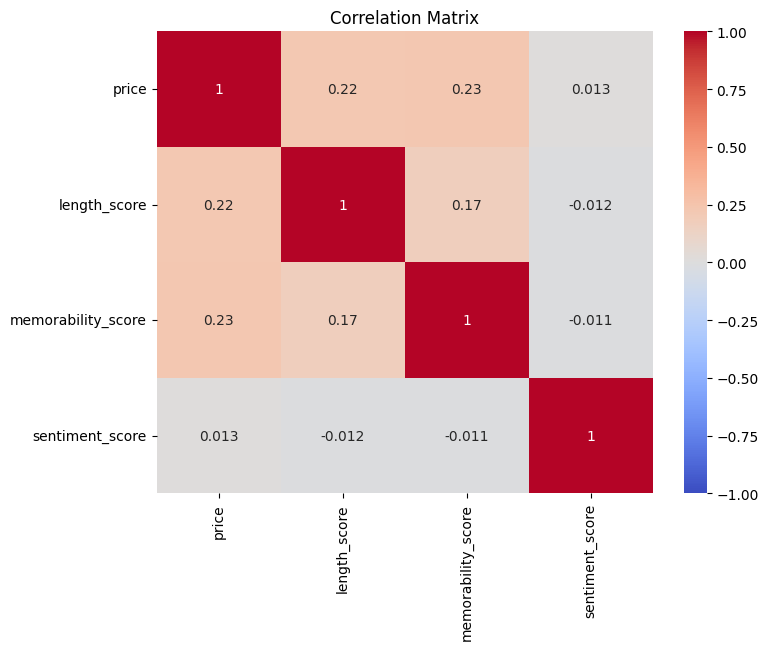

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()